In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers as layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import requests

In [6]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train= ImageDataGenerator(rescale=1/255)
validation= ImageDataGenerator(rescale=1/255)

In [9]:
dataset_path =  train.flow_from_directory('/content/drive/MyDrive/Imagedata-20240324T074019Z-001/Imagedata',
                                          target_size= (300,300),
                                          batch_size=50,
                                          class_mode='binary')
validationt_path =  validation.flow_from_directory('/content/drive/MyDrive/Imagedata-20240324T074019Z-001/Imagedata',
                                          target_size= (300,300),
                                          batch_size=50,
                                          class_mode='binary')



Found 797 images belonging to 71 classes.
Found 797 images belonging to 71 classes.


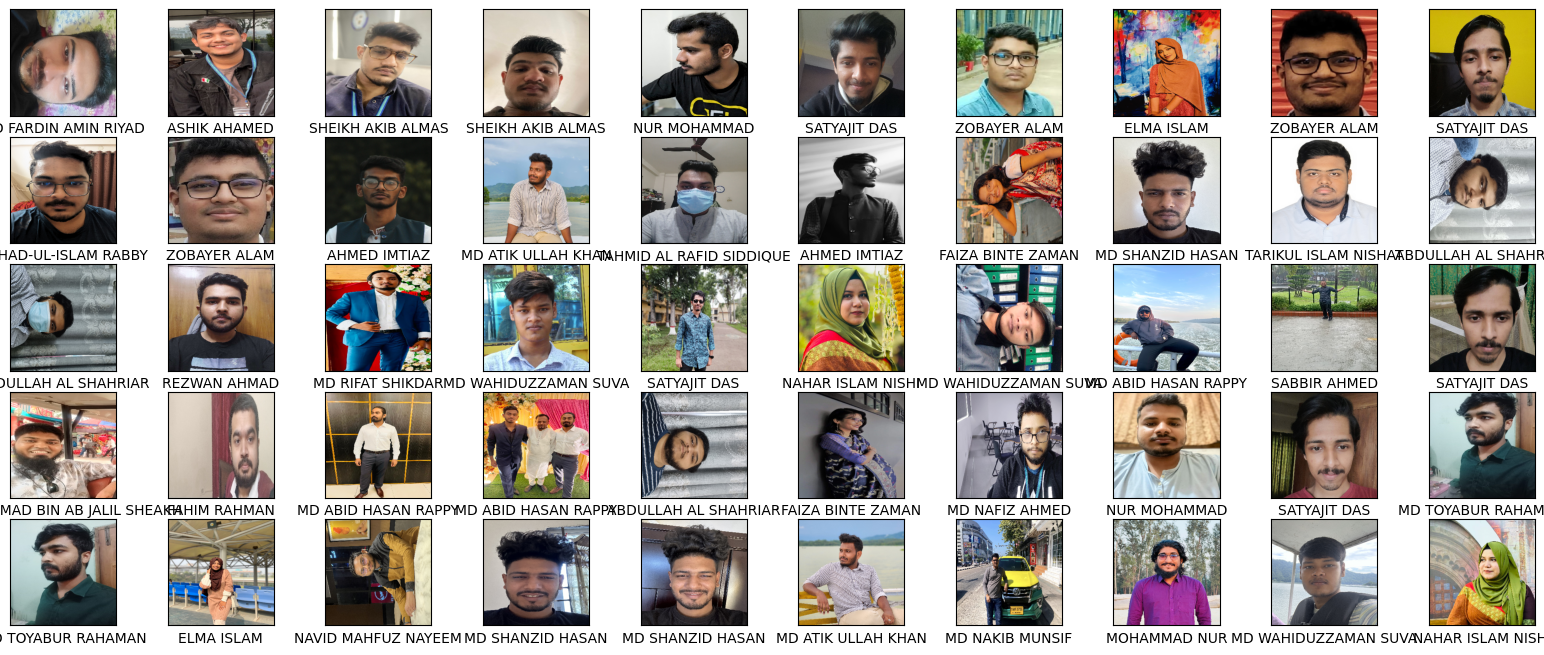

In [11]:
images, labels = next(dataset_path)
class_names = sorted(os.listdir('/content/drive/MyDrive/Imagedata-20240324T074019Z-001/Imagedata'))
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[int(labels[i])])
    #plt.xlabel(class_names[labels[i][0]])

plt.show()

In [12]:
images, labels = images/ 255.0, labels / 255.0

In [13]:
model = Sequential([
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu',input_shape=(300,300,3)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu',),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
h = model.fit(x=images, y=labels, epochs=20, validation_split=0.2, batch_size=741)

Epoch 1/20
1/1 [==============================] - 19s 19s/step - loss: 2.3025 - accuracy: 0.0000e+00 - val_loss: 2.1335 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 10s 10s/step - loss: 2.1354 - accuracy: 0.0750 - val_loss: 1.5734 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 10s 10s/step - loss: 1.5780 - accuracy: 0.0750 - val_loss: 0.6447 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 9s 9s/step - loss: 0.6511 - accuracy: 0.0750 - val_loss: 0.0640 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 9s 9s/step - loss: 0.0656 - accuracy: 0.0750 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 11s 11s/step - loss: 0.0017 - accuracy: 0.0750 - val_loss: 1.8859e-05 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 8s 8s/step - loss: 2.0119e-05 - accuracy: 0.0750 - val_loss: 1.1921e-07 - val_accuracy: 

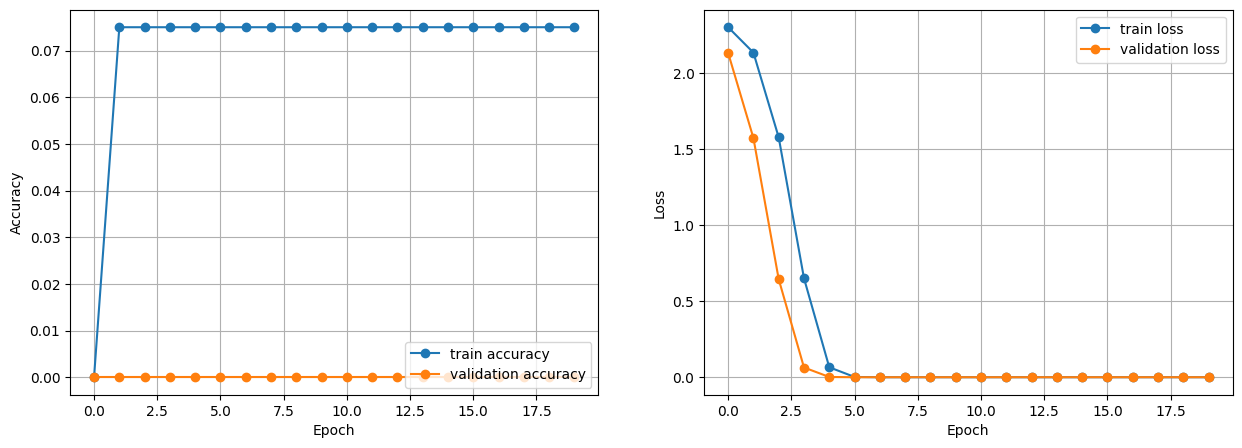

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


In [17]:
test_loss, test_acc = model.evaluate(images, labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 [==============================] - 3s 955ms/step - loss: 0.0000e+00 - accuracy: 0.0600

Test Accuracy: 0.05999999865889549

Test Loss: 0.0


In [18]:
model.save('/content/drive/MyDrive/Colab Notebooks/faceRecognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [32]:
# # JavaScript to properly create our live video stream using our webcam as input
# def video_stream():
#   js = Javascript('''
#     var video;
#     var div = null;
#     var stream;
#     var captureCanvas;
#     var imgElement;
#     var labelElement;

#     var pendingResolve = null;
#     var shutdown = false;

#     function removeDom() {
#        stream.getVideoTracks()[0].stop();
#        video.remove();
#        div.remove();
#        video = null;
#        div = null;
#        stream = null;
#        imgElement = null;
#        captureCanvas = null;
#        labelElement = null;
#     }

#     function onAnimationFrame() {
#       if (!shutdown) {
#         window.requestAnimationFrame(onAnimationFrame);
#       }
#       if (pendingResolve) {
#         var result = "";
#         if (!shutdown) {
#           captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
#           result = captureCanvas.toDataURL('image/jpeg', 0.8)
#         }
#         var lp = pendingResolve;
#         pendingResolve = null;
#         lp(result);
#       }
#     }

#     async function createDom() {
#       if (div !== null) {
#         return stream;
#       }

#       div = document.createElement('div');
#       div.style.border = '2px solid black';
#       div.style.padding = '3px';
#       div.style.width = '100%';
#       div.style.maxWidth = '600px';
#       document.body.appendChild(div);

#       const modelOut = document.createElement('div');
#       modelOut.innerHTML = "Status:";
#       labelElement = document.createElement('span');
#       labelElement.innerText = 'No data';
#       labelElement.style.fontWeight = 'bold';
#       modelOut.appendChild(labelElement);
#       div.appendChild(modelOut);

#       video = document.createElement('video');
#       video.style.display = 'block';
#       video.width = div.clientWidth - 6;
#       video.setAttribute('playsinline', '');
#       video.onclick = () => { shutdown = true; };
#       stream = await navigator.mediaDevices.getUserMedia(
#           {video: { facingMode: "environment"}});
#       div.appendChild(video);

#       imgElement = document.createElement('img');
#       imgElement.style.position = 'absolute';
#       imgElement.style.zIndex = 1;
#       imgElement.onclick = () => { shutdown = true; };
#       div.appendChild(imgElement);

#       const instruction = document.createElement('div');
#       instruction.innerHTML =
#           '' +
#           'When finished, click here to stop;
#       div.appendChild(instruction);
#       instruction.onclick = () => { shutdown = true; };

#       video.srcObject = stream;
#       await video.play();

#       captureCanvas = document.createElement('canvas');
#       captureCanvas.width = 640; //video.videoWidth;
#       captureCanvas.height = 480; //video.videoHeight;
#       window.requestAnimationFrame(onAnimationFrame);

#       return stream;
#     }
#     async function stream_frame(label, imgData) {
#       if (shutdown) {
#         removeDom();
#         shutdown = false;
#         return '';
#       }

#       var preCreate = Date.now();
#       stream = await createDom();

#       var preShow = Date.now();
#       if (label != "") {
#         labelElement.innerHTML = label;
#       }

#       if (imgData != "") {
#         var videoRect = video.getClientRects()[0];
#         imgElement.style.top = videoRect.top + "px";
#         imgElement.style.left = videoRect.left + "px";
#         imgElement.style.width = videoRect.width + "px";
#         imgElement.style.height = videoRect.height + "px";
#         imgElement.src = imgData;
#       }

#       var preCapture = Date.now();
#       var result = await new Promise(function(resolve, reject) {
#         pendingResolve = resolve;
#       });
#       shutdown = false;

#       return {'create': preShow - preCreate,
#               'show': preCapture - preShow,
#               'capture': Date.now() - preCapture,
#               'img': result};
#     }
#     ''')

#   display(js)

# def video_frame(label, bbox):
#   data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
#   return data

In [34]:
# # Define the missing function stream_frame()
# def stream_frame(label, imgData):
#     """
#     Params:
#             label: Label for the video stream
#             imgData: Image data in base64 format
#     Returns:
#             Dictionary containing frame processing times and image data
#     """
#     global shutdown  # Declare shutdown as global variable

#     if shutdown:
#         removeDom()
#         shutdown = False
#         return ''

#     preCreate = time.time()
#     stream = createDom()

#     preShow = time.time()
#     if label != "":
#         labelElement.innerHTML = label

#     if imgData != "":
#         videoRect = video.getClientRects()[0]
#         imgElement.style.top = f"{videoRect.top}px"
#         imgElement.style.left = f"{videoRect.left}px"
#         imgElement.style.width = f"{videoRect.width}px"
#         imgElement.style.height = f"{videoRect.height}px"
#         imgElement.src = imgData

#     preCapture = time.time()
#     pendingResolve = None

#     result = stream_frame_result()  # Assuming stream_frame_result is defined elsewhere

#     shutdown = False

#     return {'create': preShow - preCreate,
#             'show': preCapture - preShow,
#             'capture': time.time() - preCapture,
#             'img': result}


# # start streaming video from webcam
# video_stream()

# # label for video
# label_html = 'Capturing...'

# # initialze bounding box to empty
# bbox = ''
# count = 0

# while True:
#     js_reply = stream_frame(label_html, bbox)
#     if not js_reply:
#         break

#     # convert JS response to OpenCV Image
#     img = js_to_image(js_reply["img"])

#     # create transparent overlay for bounding box
#     bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)

#     # grayscale image for face detection
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#     # get face region coordinates
#     faces = face_cascade.detectMultiScale(gray)

#     # get face bounding box for overlay
#     for (x, y, w, h) in faces:
#         bbox_array = cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (255, 0, 0), 2)

#     bbox_array[:, :, 3] = (bbox_array.max(axis=2) > 0).astype(int) * 255

#     # convert overlay of bbox into bytes
#     bbox_bytes = bbox_to_bytes(bbox_array)

#     # update bbox so next frame gets new overlay
#     bbox = bbox_bytes


<IPython.core.display.Javascript object>

NameError: name 'shutdown' is not defined

In [ ]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
# import requests
# from IPython.display import display, Image
# import PIL.Image
# from io import BytesIO
# import time

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input



In [ ]:
# Load the trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/faceRecognition.h5')

In [ ]:
# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize the frame to match the input shape of the model
    resized_frame = cv2.resize(frame, (300, 300))
    # Convert the frame to RGB (if needed)
    rgb_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    # Normalize pixel values
    normalized_frame = rgb_frame / 255.0
    # Expand dimensions to match the input shape of the model
    preprocessed_frame = np.expand_dims(normalized_frame, axis=0)
    return preprocessed_frame

In [ ]:
# Function to make predictions on a frame
def predict_on_frame(frame):
    preprocessed_frame = preprocess_frame(frame)
    prediction = model.predict(preprocessed_frame)
    return prediction

In [ ]:
# Function to detect faces and make predictions in real-time
def detect():
    url = "http://192.168.0.101:8080/video"
    while True:
        try:

            img_resp = requests.get(url, timeout=20)  # Adjust the timeout value as needed
            img_arr = np.array(bytearray(img_resp.content), dtype=np.uint8)
            frame = cv2.imdecode(img_arr, -1)

            # Make predictions on the frame
            prediction = predict_on_frame(frame)
            cv2.putText(frame, "Prediction: {}".format(prediction), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
            cv2.imshow('Mobile Camera', frame)

            # Press 'q' to exit the loop
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        except Exception as e:
            print("Error:", e)

    # Close all windows
    cv2.destroyAllWindows()

In [ ]:
detect()

In [37]:
# import cv2

# # Open the first webcam connected to the system
# cap = cv2.VideoCapture(0)

# while True:
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Check if the frame was properly captured
#     if not ret:
#         print("Failed to capture frame")
#         break

#     # Convert the frame to grayscale for face detection
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Detect faces in the grayscale frame
#     # Your face detection code goes here...

#     # Display the original frame
#     cv2.imshow('Original Frame', frame)

#     # Display the grayscale frame
#     cv2.imshow('Grayscale Frame', gray)

#     # Break the loop if 'q' is pressed
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Release the video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()


Failed to capture frame
